### df.plot()

- Pandas 데이터타입의 plot 메서드는 matplotlib를 내부에서 임포트하여 사용
- plot 메서드 차트 종류 : kind 파라미터 값으로 전달
    - line(기본)
    - bar
    - pie
    - hist
    - box
    - scatter

In [2]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# 주가 데이터와 유사한 흐름을 보이는 샘플 생성
# value : 표준 정규 분포에서 100 x 3구조의 표본 추출
# 컬럼 3개 : A, B, C
# insex : pd.date_range(start, [end], peropds=n)
np.random.seed(111)
data = np.random.randn(100, 3)
data

array([[-1.13383833,  0.38431919,  1.49655378],
       [-0.3553823 , -0.78753354, -0.45943891],
       [-0.05916877, -0.3541735 , -0.73552305],
       [-1.18393989,  0.23889413, -0.58992026],
       [-1.44058512,  0.77370311, -1.02796733],
       [-0.09098625,  0.492003  ,  0.4246722 ],
       [ 1.28304882,  0.31598645, -0.4080822 ],
       [-0.06794759, -0.95242666, -0.1106774 ],
       [ 0.57059429,  0.91542017, -1.66934051],
       [ 0.48271364, -0.31047267,  2.39468973],
       [ 1.55093092, -0.64646518, -0.92893724],
       [-1.65497614,  0.3501925 , -0.14175652],
       [ 0.52108179, -0.02090086, -1.74384395],
       [-0.79915888, -1.30357043,  0.178105  ],
       [-0.33440236, -0.30602713, -0.33240557],
       [ 1.96294734,  0.71924249,  1.14288651],
       [ 2.08287697, -1.28464775,  0.53812761],
       [-0.04453941,  2.59716437, -0.05826628],
       [-0.945287  ,  0.54117239, -0.05500889],
       [ 1.12002081, -0.19164295, -0.61013842],
       [-0.44457885, -2.2040093 , -0.430

In [8]:
df = pd.DataFrame(data,
                 #2019-10-01 부터 100일 간의 날짜 생성
                 index=pd.date_range('10/1/2019', periods=100),
                 columns=['A', 'B', 'C']).cumsum()
df

,A,B,C
2019-10-01,-1.133838,0.384319,1.496554
2019-10-02,-1.489221,-0.403214,1.037115
2019-10-03,-1.548389,-0.757388,0.301592
2019-10-04,-2.732329,-0.518494,-0.288328
2019-10-05,-4.172914,0.255209,-1.316296
...,...,...,...
2020-01-04,-1.581068,-9.757020,0.196845
2020-01-05,-2.905018,-8.678047,1.681313
2020-01-06,-2.961347,-8.189804,1.538590
2020-01-07,-3.572676,-8.565796,0.971932


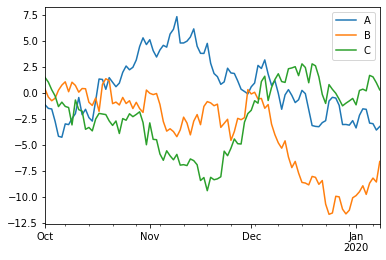

In [11]:
# 라인플롯(디폴트)
df.plot()

In [3]:
# 라이브러리에서 제공하는 기본 데이터 가져오기
import seaborn as sns

In [4]:
# 붓꽃 데이터 저장
iris = sns.load_dataset('iris')

In [5]:
iris.shape

(150, 5)

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# plot에서 한글 폰트 설정
font_name = matplotlib.font_manager.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name() # 맑은 고딕
matplotlib.rc('font', family = font_name)
# 음수부호가 정확하게 표시되기 위해 추가할 코드
matplotlib.rcParams['axes.unicode_minus']=False

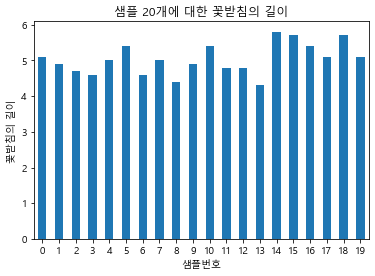

In [8]:
# sepal_length(꽃받침길이)의 20개 샘플에 대하여 bar graph로 시각화
# series.plot()
iris.sepal_length[:20].plot(kind='bar', rot=0) # rot : 숫자 각도
plt.title('샘플 20개에 대한 꽃받침의 길이')
plt.xlabel('샘플번호')
plt.ylabel('꽃받침의 길이')
plt.show()

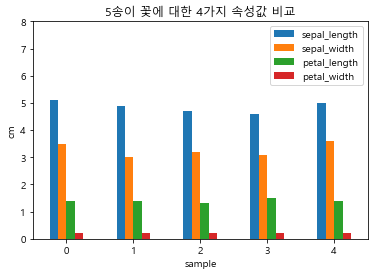

In [9]:
# 샘플 데이터의 각 속성값(sepal length, width / petal length, width )에 대해서 bar graph 생성
iris[:5].plot(kind='bar', rot=0) #plt.bar()
plt.title('5송이 꽃에 대한 4가지 속성값 비교')
plt.xlabel('sample')
plt.ylabel('cm')
plt.ylim(0, 8)
plt.show()

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# 각 종별로 4개 속성값의 평균 -> 각 속성이 종별로 어떤 차이가 있는지 보기 위해서, 
iris.pivot_table(index='species', values=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], aggfunc='mean')

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [12]:
# .groupby()를 사용하는 케이스
df2 = iris.groupby('species').mean()

In [13]:
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


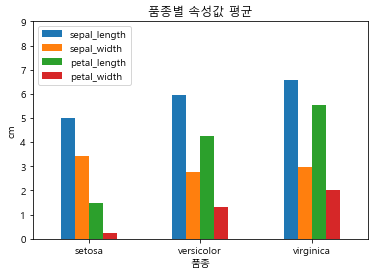

In [14]:
# bar graph로 시각화
# 인덱스별로 컬럼값을 막대그래프로 시각화
# 데이터프레임 시각화시 막대는 로우이름을 따라간다.
df2.plot(kind='bar', rot=0)
plt.title("품종별 속성값 평균")
plt.xlabel('품종')
plt.ylabel('cm')
plt.ylim(0, 9)
plt.show()

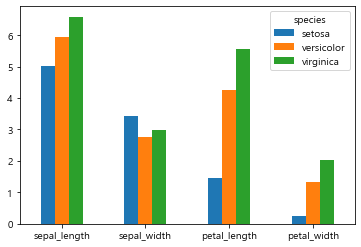

In [15]:
# x, y축 전치
df2.T.plot(kind='bar', rot=0)
plt.show()

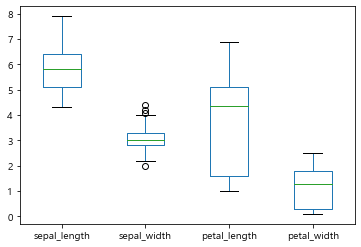

In [16]:
# 각 속성별로 데이터 값에 대한 기술통계값 및 이상치 확인 = > box-plot
# df.plot(kind='box') => 컬럼을 기준으로 기술 통계,이상치 확인
iris.plot(kind='box')
plt.show()

In [17]:
# 붓꽃 종 확인
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

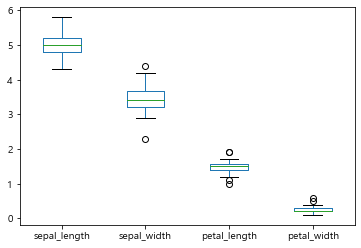

In [18]:
# 종 별로 box-plot 출력(힌트 : 조건 색인) v
# setosa
iris[iris.species=='setosa'].plot(kind='box') # iris[iris['species']=='setosa'].plot(kind='box')

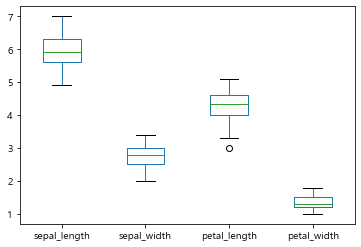

In [19]:
# versicolor
iris[iris.species=='versicolor'].plot(kind='box')

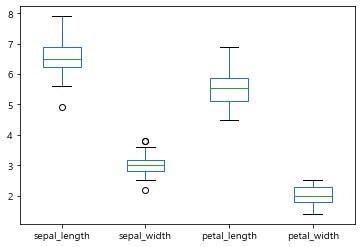

In [20]:
# virginica
iris[iris.species=='virginica'].plot(kind='box')

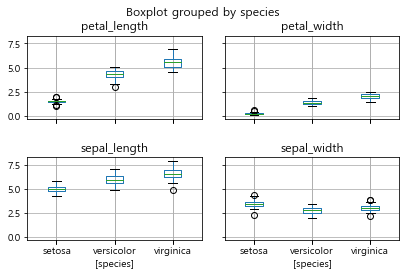

In [23]:
# 품종별로 속성별 boxplot 생성 => 하나의 plot 내부에 여러 boxplot 띄우기
# iris.plot(kind='box')
iris.boxplot(by='species')
plt.tight_layout(pad=2) # 종별로 하나하나 속성별로 비교 가능
plt.show()